##  Prediction of price of an Airbnb rental using Linear Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('analysisData.csv')
df.head(2)

c:\users\sonal\appdata\local\programs\python\python37\lib\site-packages\IPython\core\interactiveshell.py:3044: DtypeWarning: Columns (40,91) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,30551,Bright & Sunny Brooklyn 1BDR with Amazing Views,Brooklyn apartment in one of the best neighbou...,Elevator building in quiet yet central Greenpo...,Brooklyn apartment in one of the best neighbou...,none,Greenpoint / North Williamsburg,"Great, apartment in the heart of the Greenpoin...",Greenpoint Ave G train - 8 minutes Bedford L ...,Full apartment.,...,f,f,moderate,f,f,1,1,0,0,0.80
1,6174,1 Modern Bright Bedroom In The Heart of Chel...,"Newly renovated, modern and bright 2 bedroom a...",I'm renting bedroom # 1 or the whole apartment...,"Newly renovated, modern and bright 2 bedroom a...",none,The apartment is located in the center of Chel...,NaN,"Super easy access to all subways (A,C,E,1,2,3 ...","Chelsea, the High Line , Times Square, All sub...",...,f,f,strict_14_with_grace_period,f,f,2,1,1,0,0.37


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30338 entries, 0 to 30337
Columns: 103 entries, id to reviews_per_month
dtypes: float64(16), int64(32), object(55)
memory usage: 23.8+ MB


In [4]:
df.describe()

,id,thumbnail_url,medium_url,xl_picture_url,host_id,host_acceptance_rate,host_listings_count,host_total_listings_count,latitude,longitude,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,30338.000000,0.0,0.0,0.0,3.033800e+04,0.0,30338.000000,30338.000000,30338.000000,30338.000000,...,30338.000000,30338.000000,30338.000000,30338.000000,30338.000000,30338.000000,30338.000000,30338.000000,30338.000000,30336.000000
mean,19027.075845,NaN,NaN,NaN,5.676825e+07,NaN,5.872734,5.872734,40.728535,-73.952153,...,9.273485,9.746193,9.753708,9.534017,9.390434,3.668600,2.290626,1.277276,0.100699,1.329574
std,10949.401266,NaN,NaN,NaN,6.628774e+07,NaN,43.378693,43.378693,0.054383,0.045991,...,1.075639,0.696520,0.704707,0.774282,0.900464,12.097055,11.152017,4.344850,0.956953,1.574240
min,1.000000,NaN,NaN,NaN,2.787000e+03,NaN,0.000000,0.000000,40.508680,-74.239860,...,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,9524.750000,NaN,NaN,NaN,6.672280e+06,NaN,1.000000,1.000000,40.689080,-73.983190,...,9.000000,10.000000,10.000000,9.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.220000
50%,19073.500000,NaN,NaN,NaN,2.590616e+07,NaN,1.000000,1.000000,40.722490,-73.955450,...,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000,1.000000,0.000000,0.000000,0.710000
75%,28512.500000,NaN,NaN,NaN,8.804306e+07,NaN,2.000000,2.000000,40.763040,-73.936420,...,10.000000,10.000000,10.000000,10.000000,10.000000,2.000000,1.000000,1.000000,0.000000,1.970000
max,37923.000000,NaN,NaN,NaN,2.464229e+08,NaN,1199.000000,1199.000000,40.908040,-73.712990,...,10.000000,10.000000,10.000000,10.000000,10.000000,192.000000,192.000000,115.000000,24.000000,19.360000


## Data Cleaning

In [5]:
def remove_nan(df):
    
    df['boroughs'] = df['neighbourhood_group_cleansed'].apply(lambda x:x.split(',')[0].strip())
    df['state'].fillna(value='NY', inplace=True)
    df['city'].fillna(value='New York', inplace=True)    
    df['market'].fillna(value='New York', inplace=True)
    df['beds'].fillna(value= df['beds'].mean(), inplace=True)

    df.drop(['experiences_offered','thumbnail_url','medium_url','xl_picture_url','host_acceptance_rate','square_feet','weekly_price','monthly_price','license',
             'jurisdiction_names','notes', 'neighborhood_overview', 'transit','access','interaction','house_rules','host_about','security_deposit',
             'host_response_time','host_response_rate', 'space', 'host_neighbourhood','cleaning_fee','host_location','summary',
             'zipcode','description','name','first_review','last_review'], axis=1, inplace=True)
    return df


In [6]:
df.iloc[:3,]

,id,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,30551,Bright & Sunny Brooklyn 1BDR with Amazing Views,Brooklyn apartment in one of the best neighbou...,Elevator building in quiet yet central Greenpo...,Brooklyn apartment in one of the best neighbou...,none,Greenpoint / North Williamsburg,"Great, apartment in the heart of the Greenpoin...",Greenpoint Ave G train - 8 minutes Bedford L ...,Full apartment.,...,f,f,moderate,f,f,1,1,0,0,0.80
1,6174,1 Modern Bright Bedroom In The Heart of Chel...,"Newly renovated, modern and bright 2 bedroom a...",I'm renting bedroom # 1 or the whole apartment...,"Newly renovated, modern and bright 2 bedroom a...",none,The apartment is located in the center of Chel...,NaN,"Super easy access to all subways (A,C,E,1,2,3 ...","Chelsea, the High Line , Times Square, All sub...",...,f,f,strict_14_with_grace_period,f,f,2,1,1,0,0.37
2,21838,"Private room in bustling Bushwick, Brooklyn",This sweet apartment is in a fun and walkable ...,NaN,This sweet apartment is in a fun and walkable ...,none,"The apartment is on a quiet street, but you're...",Two other people live in this apartment — both...,10 minutes to Williamsburg or 15-20 mins to th...,NaN,...,t,f,flexible,f,f,1,0,1,0,0.15


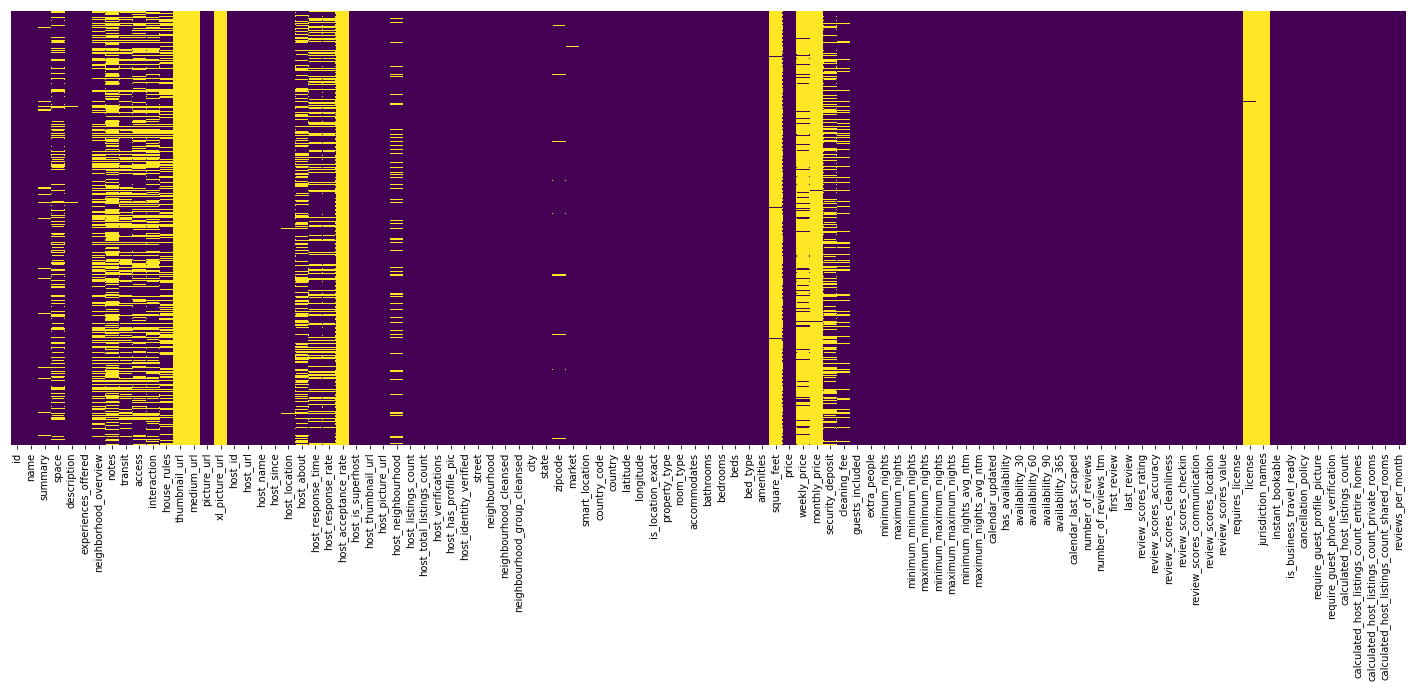

In [7]:
plt.figure(figsize=(25,8))
sns.heatmap(df.isnull(), yticklabels=False,cbar=False,cmap='viridis')
plt.show()

In [8]:
df = remove_nan(df)

In [9]:
df.iloc[:2, :]

,id,picture_url,host_id,host_url,host_name,host_since,host_is_superhost,host_thumbnail_url,host_picture_url,host_listings_count,...,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,boroughs
0,30551,https://a0.muscache.com/im/pictures/82c15798-6...,20126746,https://www.airbnb.com/users/show/20126746,Alexandra,2014-08-16,f,https://a0.muscache.com/im/pictures/user/100b0...,https://a0.muscache.com/im/pictures/user/100b0...,1,...,f,moderate,f,f,1,1,0,0,0.80,Brooklyn
1,6174,https://a0.muscache.com/im/pictures/c7820fca-f...,21368131,https://www.airbnb.com/users/show/21368131,Bertrand,2014-09-15,f,https://a0.muscache.com/im/pictures/5caa1b4a-8...,https://a0.muscache.com/im/pictures/5caa1b4a-8...,2,...,f,strict_14_with_grace_period,f,f,2,1,1,0,0.37,Manhattan


In [10]:
def dummies_set_t_f_vlaues(df):
    
    boroughs = pd.get_dummies(df['boroughs'])
    room_type = pd.get_dummies(df['room_type'])
    property_type = pd.get_dummies(df['property_type'])
    df = pd.concat([df,boroughs, room_type, property_type], axis=1)
    df.dropna(inplace= True)
    return df

data = dummies_set_t_f_vlaues(df)
data.head(3)

,id,picture_url,host_id,host_url,host_name,host_since,host_is_superhost,host_thumbnail_url,host_picture_url,host_listings_count,...,Houseboat,Loft,Nature lodge,Other,Resort,Serviced apartment,Tent,Tiny house,Townhouse,Villa
0,30551,https://a0.muscache.com/im/pictures/82c15798-6...,20126746,https://www.airbnb.com/users/show/20126746,Alexandra,2014-08-16,f,https://a0.muscache.com/im/pictures/user/100b0...,https://a0.muscache.com/im/pictures/user/100b0...,1,...,0,0,0,0,0,0,0,0,0,0
1,6174,https://a0.muscache.com/im/pictures/c7820fca-f...,21368131,https://www.airbnb.com/users/show/21368131,Bertrand,2014-09-15,f,https://a0.muscache.com/im/pictures/5caa1b4a-8...,https://a0.muscache.com/im/pictures/5caa1b4a-8...,2,...,0,0,0,0,0,0,0,0,0,0
2,21838,https://a0.muscache.com/im/pictures/e6e6540e-2...,55209173,https://www.airbnb.com/users/show/55209173,Camille,2016-01-18,f,https://a0.muscache.com/im/pictures/ecd1fa54-2...,https://a0.muscache.com/im/pictures/ecd1fa54-2...,1,...,0,0,0,0,0,0,0,0,0,0


In [11]:
df.isnull().sum()

id                                              0
picture_url                                     0
host_id                                         0
host_url                                        0
host_name                                       0
host_since                                      0
host_is_superhost                               0
host_thumbnail_url                              0
host_picture_url                                0
host_listings_count                             0
host_total_listings_count                       0
host_verifications                              0
host_has_profile_pic                            0
host_identity_verified                          0
street                                          0
neighbourhood                                   8
neighbourhood_cleansed                          0
neighbourhood_group_cleansed                    0
city                                            0
state                                           0


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30328 entries, 0 to 30337
Columns: 111 entries, id to Villa
dtypes: float64(7), int64(32), object(35), uint8(37)
memory usage: 18.4+ MB


## Exploratory Data Analysis

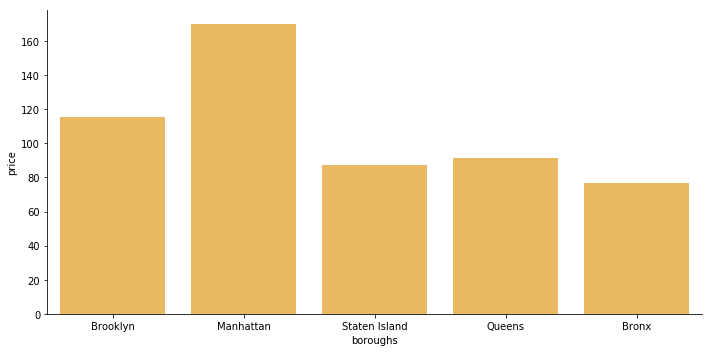

In [13]:
sns.catplot(x="boroughs", y="price", kind="bar", data=data, aspect=2, color='orange', alpha=0.7, ci=None);

From above graph we can interpret that Manhattan has maximum price for airBnB rental and then, Brooklyn, Queens, Staten Island, and Bronx have rental pricing in decrising order.

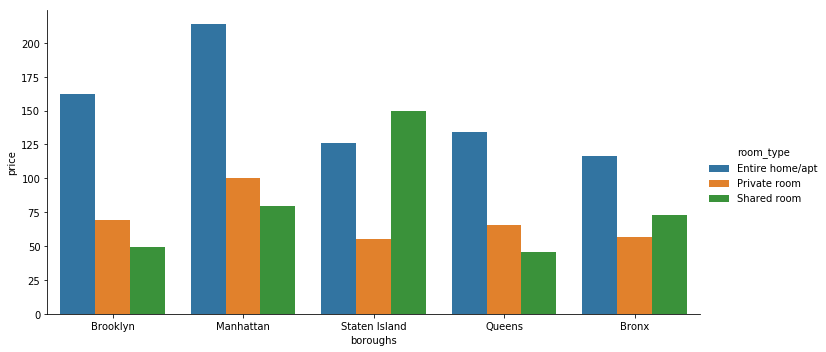

In [14]:
sns.catplot(x="boroughs", y="price", hue='room_type', kind="bar", data=data, aspect=2, ci=False)

Here, we can see room types (Entire home/apt, Private room and Shared room) according to NYC boroughs. At first glance, we can notice Manhattan has maximum price for Entire home/apt and Private room rental whereas Staten Island has maximum price for Shared room rental. 

In contrary, Bronx has low rental price for all room types.

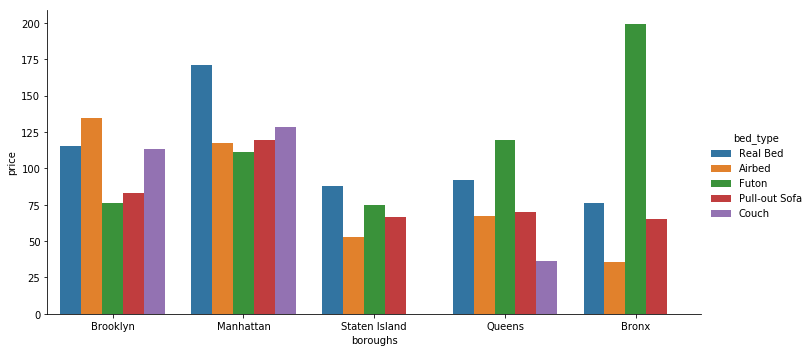

In [15]:
sns.catplot(x="boroughs", y="price", hue='bed_type', kind="bar", data=data, aspect=2, ci=False)

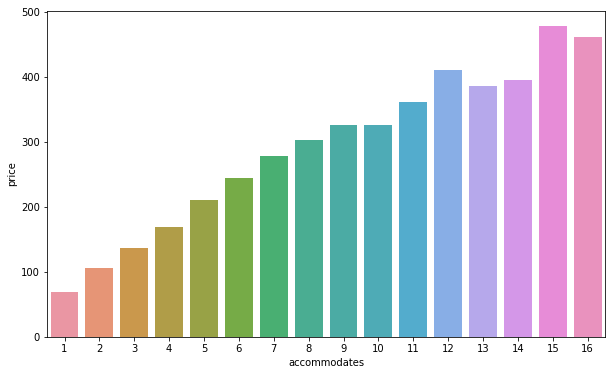

In [16]:
plt.figure(figsize=(10,6))
sns.barplot(x='accommodates', y='price', data=data, ci=None)

Above graph shows rental price according to accommodates, and it makes sense because if we stay longer, we have to pay high price.

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30328 entries, 0 to 30337
Columns: 111 entries, id to Villa
dtypes: float64(7), int64(32), object(35), uint8(37)
memory usage: 19.7+ MB


In [18]:
data[data.columns[1:]].corr()['price'][:]

host_id                     -0.003485
host_listings_count          0.055102
host_total_listings_count    0.055102
latitude                     0.063589
longitude                   -0.264240
accommodates                 0.556734
bathrooms                    0.277255
bedrooms                     0.434031
beds                         0.450661
price                        1.000000
guests_included              0.373731
extra_people                 0.119893
minimum_nights               0.009462
maximum_nights              -0.000272
minimum_minimum_nights       0.003582
maximum_minimum_nights       0.009412
minimum_maximum_nights      -0.000272
maximum_maximum_nights      -0.000272
minimum_nights_avg_ntm       0.008994
maximum_nights_avg_ntm      -0.000272
availability_30              0.043223
availability_60              0.013741
availability_90              0.013626
availability_365             0.084143
number_of_reviews           -0.018234
number_of_reviews_ltm       -0.020064
review_score

## AirBnB Price Predication using  Linear Regression

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, confusion_matrix

In [20]:
X = data[['extra_people','guests_included','beds','bedrooms','bathrooms','accommodates', 
          'review_scores_location','calculated_host_listings_count_entire_homes',
          'Bronx','Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Entire home/apt', 'Private room', 'Shared room',
          'Loft', 'Resort']]
y = data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [21]:
prediction = model.predict(X_test)

Text(0, 0.5, 'Predication')

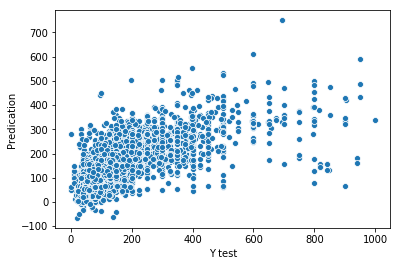

In [22]:
sns.scatterplot(y_test, prediction)
plt.xlabel('Y test')
plt.ylabel('Predication')

In [23]:
pd.DataFrame(model.coef_, index=X.columns, columns=['Coef_'])

,Coef_
extra_people,0.153421
guests_included,1.637732
beds,0.047157
bedrooms,26.985173
bathrooms,40.814286
accommodates,12.883667
review_scores_location,11.580328
calculated_host_listings_count_entire_homes,0.147874
Bronx,-13.314766
Brooklyn,2.396921


In [24]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [25]:
print('MAE :', mean_absolute_error(y_test, prediction))
print('MSE :', mean_squared_error(y_test, prediction))
print('RMSE :', np.sqrt(mean_squared_error(y_test, prediction)))

MAE : 45.56847885684079
MSE : 5321.056613155048
RMSE : 72.94557295103691


## Predicting price for unseen data

In [26]:
test_df = pd.read_csv('scoringData.csv', index_col=0)

test_df = remove_nan(test_df)
test_data = dummies_set_t_f_vlaues(test_df)

test_data = test_data[['extra_people','guests_included','beds','bedrooms','bathrooms','accommodates', 
          'review_scores_location','calculated_host_listings_count_entire_homes',
         'Bronx','Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Entire home/apt', 'Private room', 'Shared room',
         'Loft', 'Resort']]

In [27]:
test_price = model.predict(test_data)
sample_price = pd.DataFrame([test_data.index,test_price])

final_df = sample_price.T
final_df.columns = ['id', 'price']
final_df['id'] = final_df['id'].astype(int)

final_df

,id,price
0,2,148.482297
1,7,98.224015
2,8,178.500047
3,9,162.249409
4,26,94.187380
5,28,133.816136
6,34,113.408993
7,35,122.406521
8,40,87.305162
9,48,150.773721


In [28]:
header = ["id", "price"]
final_df.to_csv('sample_submission.csv', columns = header, index=False)